#**Algorithmic Thinking**

#**Installations and Imports**

In [1]:
import time

import random

import math

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

#**Helper Functions**

In [2]:
def plot_side_by_side(x1, y1, x2, y2, x1_label, y1_label, x2_label, y2_label, title1, title2, figsize):
    '''
    Function to plot two graphs side by side.

    Parameters:
    x1, y1 (list or array-like): Data for the first plot
    x1_label, y1_label (str): x and y axis labels for the first plot
    title1 (str): Title for the first plot

    x2, y2 (list or array-like): Data for the second plot
    x2_label, y2_label (str): x and y axis labels for the second plot
    title2 (str): Title for the second plot

    figsize (tuple): Figure size, width and height in inches
    '''

    # Initialize a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Plot the data for the first plot
    ax1.plot(x1, y1, label=title1)
    # Set the labels for the first plot
    ax1.set_xlabel(x1_label)
    ax1.set_ylabel(y1_label)
    # Display the legend for the first plot
    ax1.legend()

    # Plot the data for the second plot
    ax2.plot(x2, y2, label=title2)
    # Set the labels for the second plot
    ax2.set_xlabel(x2_label)
    ax2.set_ylabel(y2_label)
    # Display the legend for the second plot
    ax2.legend()

    # Adjust the layout so everything fits nicely
    plt.tight_layout()

    # Display the plots
    plt.show()

In [3]:
def generate_random_numbers(n, low, high, seed=12345, sort=False):
    """
    Generate a list of n random integer numbers within a given range.

    Parameters:
    n (int): The number of random numbers to generate.
    low (int): The lower limit of the range.
    high (int): The upper limit of the range.
    seed (int, optional): The seed for the random number generator.
    sort (bool, optional): Whether to sort the numbers.

    Returns:
    numpy.ndarray: A numpy array of random numbers.
    """

    generator = np.random.default_rng(seed)

    # Generate n random integers in the range [low, high)
    random_numbers = generator.integers(low, high, size=n)

    if sort:
        random_numbers = np.sort(random_numbers)

    return random_numbers

In [4]:
def measure_execution(is_prime_function, num):
    """
    Measures the execution time of a given prime check function.

    Parameters:
    is_prime_function (function): The prime check function
    num (int): The number to check

    Returns:
    tuple: A tuple containing a boolean indicating if the number is prime, the count of divisions performed, and the elapsed time.
    """
    starting_time = time.time()
    is_prime_result, division_counter = is_prime_function(num)
    elapsed_time = time.time() - starting_time
    return is_prime_result, division_counter, elapsed_time

def get_execution_log(is_prime_function, list_of_numbers):
    """
    Generates an execution log for a given prime check function on a list of numbers.

    Parameters:
    is_prime_function (function): The prime check function
    list_of_numbers (list): The list of numbers to check

    Returns:
    numpy array: A numpy array containing the execution log.
    """
    execution_log = np.empty((len(list_of_numbers), 3))  # Initialize numpy array for performance
    for idx, value in enumerate(list_of_numbers):
        is_prime_result, division_counter, elapsed_time = measure_execution(is_prime_function, value)
        execution_log[idx] = np.array([value, division_counter, elapsed_time])
    return execution_log

In [5]:
def plot_comparison(slow_log, partially_optimized_log, optimized_log, figsize):
    """
    This function takes in three logs: slow_log, partially_optimized_log, and optimized_log,
    and plots them side by side for comparison. The logs should be numpy arrays.

    Parameters:
    slow_log (numpy array): Log of operations for the slow method
    partially_optimized_log (numpy array): Log of operations for the partially optimized method
    optimized_log (numpy array): Log of operations for the optimized method
    figsize (tuple): Size of the figure to plot.
    """

    # Create subplots with 1 row and 2 columns, with specified size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Plot number of divisions for each method on the first subplot
    ax1.plot(slow_log[:,0], slow_log[:,1], label='slow', color='b')
    ax1.plot(partially_optimized_log[:,0], partially_optimized_log[:,1], label='partially optimized', color='g')
    ax1.plot(optimized_log[:,0], optimized_log[:,1], label='optimized', color='y')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Number of divisions')
    ax1.legend()

    # Plot elapsed time for each method on the second subplot
    ax2.plot(slow_log[:,0], slow_log[:,2], label='slow', color='b')
    ax2.plot(partially_optimized_log[:,0], partially_optimized_log[:,2], label='partially optimized', color='g')
    ax2.plot(optimized_log[:,0], optimized_log[:,2], label='optimized', color='y')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Elapsed time')
    ax2.legend()

    # Improve layout
    plt.tight_layout()

    plt.show()

In [6]:
def plot_complexity_classes(figsize=(10, 6), upper_limit=256, y_limit=64, x_limit=20):
    """
    Plot different computational complexity classes.

    Parameters:
    figsize (tuple): Tuple defining the size of the figure.
    upper_limit (int): Upper limit for the x-axis.
    y_limit (int): Upper limit for the y-axis.
    x_limit (int): Upper limit for the x-axis in the plot.

    Returns:
    None
    """

    # Define the limit
    limit = range(1, upper_limit)
    small_limit = range(1, min(upper_limit, 20))  # Smaller limit for large complexity classes

    fig, ax = plt.subplots(figsize=figsize)

    # Define the different complexity classes
    complexity_classes = [
        (limit, [1 for _ in limit], r'$O(1)$ constant'),
        (limit, [math.log(i) for i in limit], r'$O(\log n)$ logarithmic'),
        (limit, [i for i in limit], r'$O(n)$ linear'),
        (limit, [i*math.log(i) for i in limit], r'$O(n \log n)$ log-linear'),
        (limit, [i**2 for i in limit], r'$O(n^2)$ quadratic'),
        (limit, [i**3 for i in limit], r'$O(n^3)$ cubic'),
        (limit, [i**2 * math.log(i) for i in limit], r'$O(n^2 \log n)$ quadratic-logarithmic'),
        (limit, [2**i for i in limit], r'$O(2^n)$ exponential'),
        (small_limit, [math.factorial(i) for i in small_limit], r'$O(n!)$ factorial'),
        (small_limit, [i**i for i in small_limit], r'$O(n^n)$ super-exponential'),
    ]

    # Plot each complexity class
    for x_values, y_values, label in complexity_classes:
        ax.plot(x_values, y_values, label=label)

    ax.legend(loc='upper right')

    # Set y-axis and x-axis limits
    plt.ylim(0, y_limit)
    plt.xlim(0, x_limit)

    ax.set_xlabel('Input size (n)', fontsize=12)
    ax.set_ylabel('Operations', fontsize=12)
    ax.set_title('Computational Complexity Classes', fontsize=14)

    ax.grid(True)

    plt.tight_layout()
    plt.show()


#**Comparison Between Multiple Solutions of Prime Number Detection**

**Slow Method**

In [7]:
def is_prime_slow(num):
    """
    Checks if a number is prime using the slow method.
    This function goes through each number up to 'num' to check for factors.

    Parameters:
    num (int): The number to check

    Returns:
    tuple: A tuple containing a boolean indicating if the number is prime and the count of divisions performed.
    """
    division_counter = 0
    if num <= 1:
        return False, division_counter  # If number is less than or equal to 1, it's not prime
    for i in range(2, num):
        division_counter += 1
        if num % i == 0:
            return False, division_counter  # If number has a divisor other than 1 and itself, it's not prime
    return True, division_counter  # If no divisors found, it's prime

**Partially Optimized**

In [8]:
def is_prime_partially_optimized(num):
    """
    Checks if a number is prime using a partially optimized method.
    This function goes through each number up to 'num/2' to check for factors, reducing the number of checks.

    Parameters:
    num (int): The number to check

    Returns:
    tuple: A tuple containing a boolean indicating if the number is prime and the count of divisions performed.
    """
    division_counter = 0
    if num <= 1:
        return False, division_counter  # If number is less than or equal to 1, it's not prime
    for i in range(2, num // 2 + 1):
        division_counter += 1
        if num % i == 0:
            return False, division_counter  # If number has a divisor other than 1 and itself, it's not prime
    return True, division_counter  # If no divisors found, it's prime

**Optimized**

In [9]:
def is_prime_optimized(num):
    """
    Checks if a number is prime using the optimized method.
    This function goes through each number up to the square root of 'num' to check for factors, further reducing the number of checks.

    Parameters:
    num (int): The number to check

    Returns:
    tuple: A tuple containing a boolean indicating if the number is prime and the count of divisions performed.
    """
    division_counter = 0
    if num <= 1:
        return False, division_counter  # If number is less than or equal to 1, it's not prime
    for i in range(2, int(math.sqrt(num)) + 1):
        division_counter += 1
        if num % i == 0:
            return False, division_counter  # If number has a divisor other than 1 and itself, it's not prime
    return True, division_counter  # If no divisors found, it's prime

**Comparison**

In [22]:
# Generating Random Integers

n = 30

low = 2

high = 100

random_numbers = generate_random_numbers(n = n, low = low, high = high, sort = True)

print(random_numbers)

[11 14 20 22 22 24 24 26 28 33 34 40 45 57 60 62 64 67 67 68 70 71 73 79
 80 84 91 94 94 98]


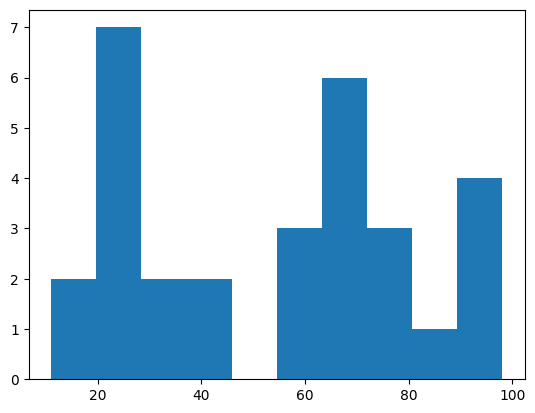

In [23]:
plt.hist(random_numbers, bins = 10)

plt.show()

In [12]:
slow_execution_log = get_execution_log(is_prime_slow, random_numbers)

partially_optimized_execution_log = get_execution_log(is_prime_partially_optimized, random_numbers)

optimized_execution_log = get_execution_log(is_prime_optimized, random_numbers)

In [13]:
# Generate DataFrames
df_slow = pd.DataFrame(slow_execution_log, columns=['Value', 'Number of divisions', 'Elapsed time'])

df_partially_optimized = pd.DataFrame(partially_optimized_execution_log, columns=['Value', 'Number of divisions', 'Elapsed time'])

df_optimized = pd.DataFrame(optimized_execution_log, columns=['Value', 'Number of divisions', 'Elapsed time'])


Execution Log (Slow Method):
    Value  Number of divisions  Elapsed time
0    11.0                  9.0  1.716614e-05
1    14.0                  1.0  1.907349e-06
2    20.0                  1.0  1.192093e-06
3    22.0                  1.0  9.536743e-07
4    22.0                  1.0  1.192093e-06
5    24.0                  1.0  1.192093e-06
6    24.0                  1.0  9.536743e-07
7    26.0                  1.0  9.536743e-07
8    28.0                  1.0  9.536743e-07
9    33.0                  2.0  1.192093e-06
10   34.0                  1.0  1.430511e-06
11   40.0                  1.0  1.192093e-06
12   45.0                  2.0  1.430511e-06
13   57.0                  2.0  1.430511e-06
14   60.0                  1.0  1.430511e-06
15   62.0                  1.0  9.536743e-07
16   64.0                  1.0  9.536743e-07
17   67.0                 65.0  1.716614e-05
18   67.0                 65.0  2.288818e-05
19   68.0                  1.0  1.192093e-06
20   70.0                

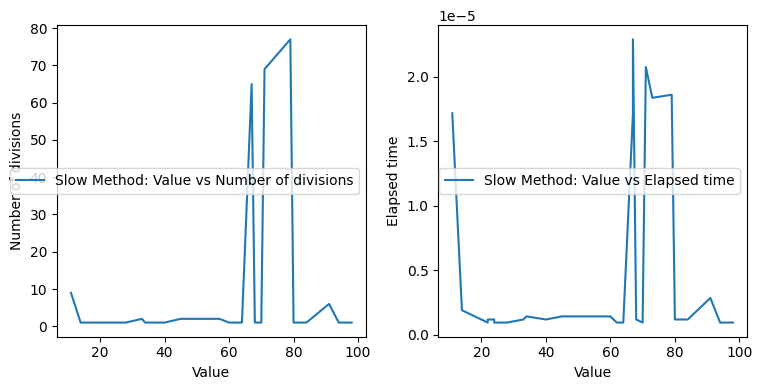

In [14]:
print("\nExecution Log (Slow Method):")
print(df_slow)

plot_side_by_side(slow_execution_log[:,0],
                  slow_execution_log[:,1],
                  slow_execution_log[:,0],
                  slow_execution_log[:,2],
                  'Value',
                  'Number of divisions',
                  'Value',
                  'Elapsed time',
                  'Slow Method: Value vs Number of divisions', 'Slow Method: Value vs Elapsed time',
                   (8, 4))


Execution Log (Partially Optimized Method):
    Value  Number of divisions  Elapsed time
0    11.0                  4.0  6.198883e-06
1    14.0                  1.0  1.430511e-06
2    20.0                  1.0  1.430511e-06
3    22.0                  1.0  1.192093e-06
4    22.0                  1.0  1.192093e-06
5    24.0                  1.0  1.430511e-06
6    24.0                  1.0  1.192093e-06
7    26.0                  1.0  9.536743e-07
8    28.0                  1.0  1.192093e-06
9    33.0                  2.0  1.430511e-06
10   34.0                  1.0  1.668930e-06
11   40.0                  1.0  1.192093e-06
12   45.0                  2.0  1.192093e-06
13   57.0                  2.0  1.430511e-06
14   60.0                  1.0  1.192093e-06
15   62.0                  1.0  1.192093e-06
16   64.0                  1.0  1.668930e-06
17   67.0                 32.0  1.072884e-05
18   67.0                 32.0  9.298325e-06
19   68.0                  1.0  1.430511e-06
20   70.0 

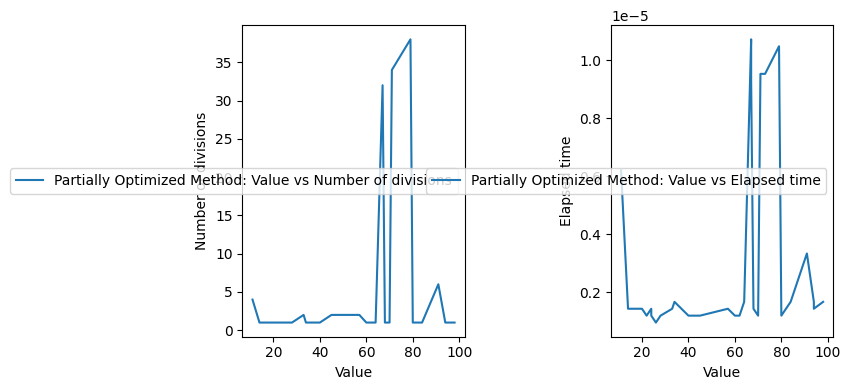

In [15]:
print("\nExecution Log (Partially Optimized Method):")
print(df_partially_optimized)

plot_side_by_side(partially_optimized_execution_log[:,0],
                  partially_optimized_execution_log[:,1],
                  partially_optimized_execution_log[:,0],
                  partially_optimized_execution_log[:,2],
                  'Value',
                  'Number of divisions',
                  'Value',
                  'Elapsed time',
                  'Partially Optimized Method: Value vs Number of divisions', 'Partially Optimized Method: Value vs Elapsed time', (8, 4))


Execution Log (Optimized Method):
    Value  Number of divisions  Elapsed time
0    11.0                  2.0      0.000010
1    14.0                  1.0      0.000002
2    20.0                  1.0      0.000002
3    22.0                  1.0      0.000001
4    22.0                  1.0      0.000001
5    24.0                  1.0      0.000002
6    24.0                  1.0      0.000002
7    26.0                  1.0      0.000001
8    28.0                  1.0      0.000002
9    33.0                  2.0      0.000002
10   34.0                  1.0      0.000001
11   40.0                  1.0      0.000002
12   45.0                  2.0      0.000002
13   57.0                  2.0      0.000001
14   60.0                  1.0      0.000002
15   62.0                  1.0      0.000001
16   64.0                  1.0      0.000001
17   67.0                  7.0      0.000004
18   67.0                  7.0      0.000003
19   68.0                  1.0      0.000001
20   70.0           

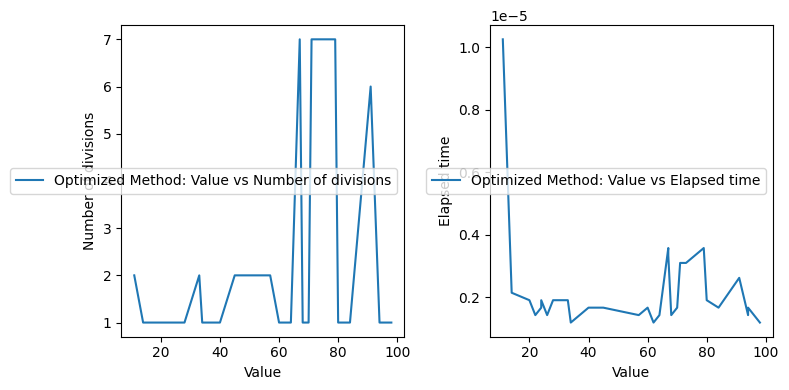

In [16]:
print("\nExecution Log (Optimized Method):")
print(df_optimized)
plot_side_by_side(optimized_execution_log[:,0],
                  optimized_execution_log[:,1],
                  optimized_execution_log[:,0],
                  optimized_execution_log[:,2],
                  'Value',
                  'Number of divisions',
                  'Value',
                  'Elapsed time',
                  'Optimized Method: Value vs Number of divisions', 'Optimized Method: Value vs Elapsed time',
                   (8, 4))

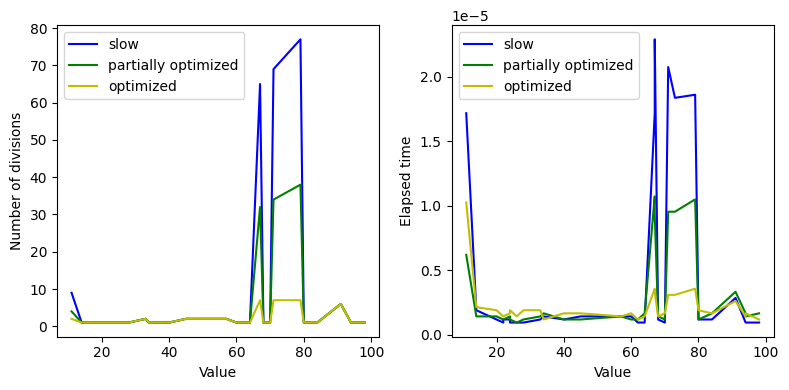

In [17]:
# Comparing all three approaches
plot_comparison(slow_execution_log, partially_optimized_execution_log, optimized_execution_log, figsize=(8, 4))

#**Complexity Classes**

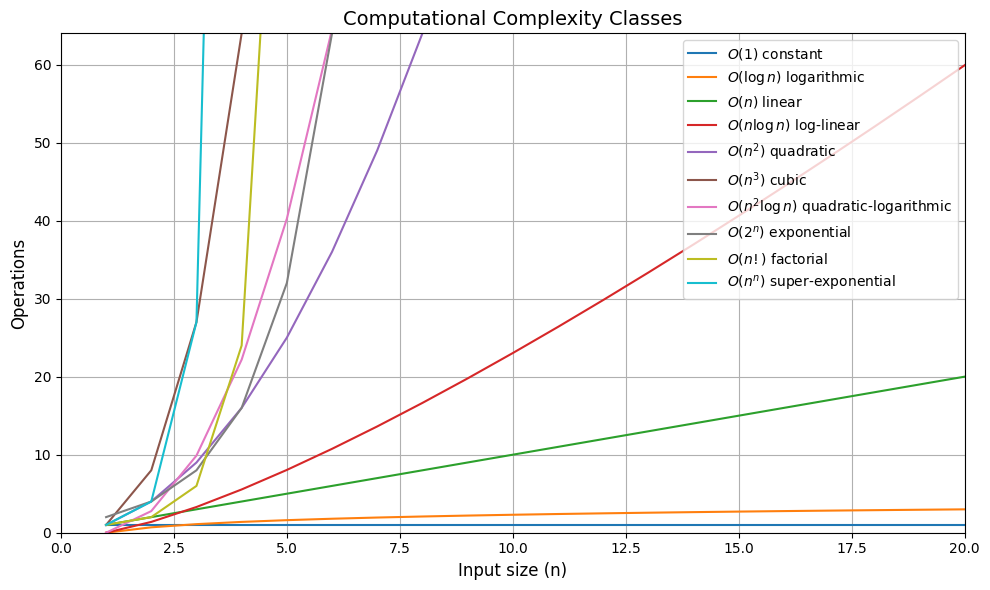

In [18]:
plot_complexity_classes(figsize=(10, 6), upper_limit=128, y_limit=64, x_limit=20)